<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/current_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.visualcrossing.com/weather/weather-data-services#

In [1]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:

import subprocess

# Run the shell command and capture the output
result = subprocess.run("ls -t drive/MyDrive/weather/*.csv | head -1", shell=True, stdout=subprocess.PIPE, text=True)

# Get the name of the file
filename = result.stdout.strip()

print("Using file ", filename)

Using file  drive/MyDrive/weather/paphos2024-09-30.csv


In [7]:
import pandas as pd

#df=pd.read_csv(filename,usecols=['datetime','temp','feelslike','humidity'],parse_dates=['datetime'])

df=pd.read_csv(filename,parse_dates=['datetime'])

df.set_index('datetime', inplace=True)
save=df

df=df.last('7D')

<ipython-input-7-671971ab2254>:10: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df=df.last('7D')


In [11]:
df

,name,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2024-09-24 00:00:00,"34.68,32.61",22.0,22.0,15.9,68.76,0.0,0,NaN,0,0,...,1012.9,0.0,10.0,0.0,0.0,0.0,NaN,Clear,clear-night,"LCRA,F1785,LCPH"
2024-09-24 01:00:00,"34.68,32.61",22.0,22.0,15.0,64.49,0.0,0,NaN,0,0,...,1012.9,0.0,10.0,0.0,0.0,0.0,NaN,Clear,clear-night,"LCRA,F1785,LCPH"
2024-09-24 02:00:00,"34.68,32.61",22.0,22.0,15.7,67.61,0.0,0,NaN,0,0,...,1013.0,0.0,10.0,0.0,0.0,0.0,NaN,Clear,clear-night,"LCRA,F1785,LCPH"
2024-09-24 03:00:00,"34.68,32.61",21.0,21.0,14.6,66.84,0.0,0,NaN,0,0,...,1013.0,1.4,10.0,0.0,0.0,0.0,NaN,Clear,clear-night,"LCRA,F1785,LCPH"
2024-09-24 04:00:00,"34.68,32.61",21.0,21.0,15.6,71.28,0.0,0,NaN,0,0,...,1013.0,5.1,10.0,0.0,0.0,0.0,NaN,Clear,clear-night,"LCRA,F1785,LCPH"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30 19:00:00,"34.68,32.61",26.0,26.0,20.8,73.36,0.0,0,NaN,0,0,...,1006.0,90.1,10.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"LCRA,F1785,LCPH"
2024-09-30 20:00:00,"34.68,32.61",26.0,26.0,20.8,73.36,0.1,100,rain,0,0,...,1006.9,90.1,10.0,0.0,0.0,0.0,NaN,"Rain, Overcast",rain,"LCRA,F1785,LCPH"
2024-09-30 21:00:00,"34.68,32.61",26.0,26.0,18.2,62.40,0.1,100,rain,0,0,...,1006.9,46.7,10.0,0.0,0.0,0.0,NaN,"Rain, Partially cloudy",rain,"LCRA,F1785,LCPH"


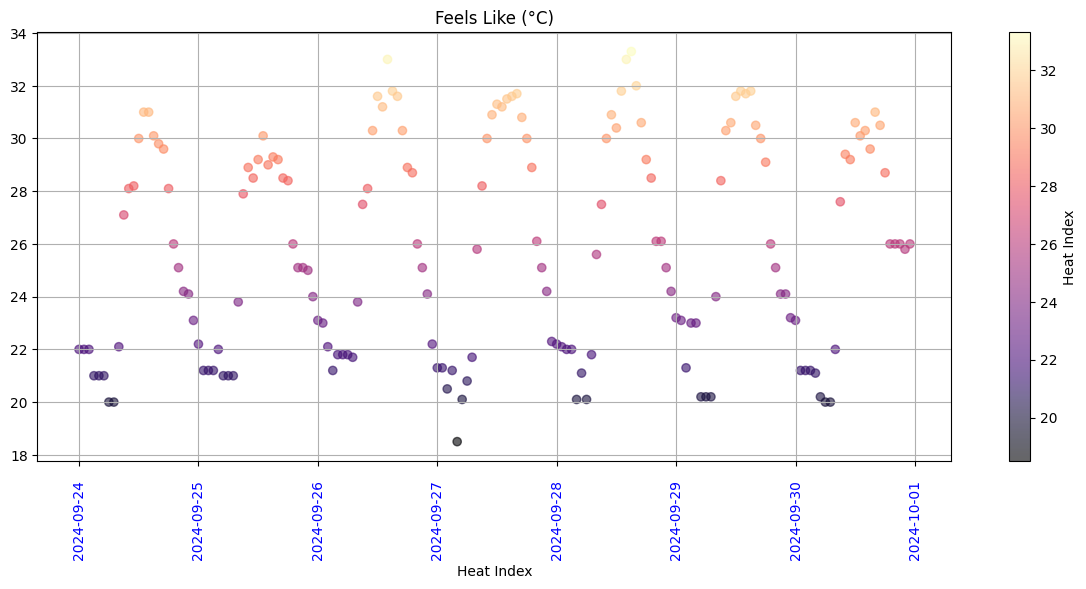

In [4]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Your data preparation code here (e.g., df creation, filestr, unitgroup)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colormap
sc = ax.scatter(df.index, df['feelslike'], c=df['feelslike'], cmap='magma', alpha=0.6)

plt.title('Feels Like (°C)')

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Heat Index')

# Set labels
ax.set_xlabel('Heat Index')
plt.xticks(rotation=90)


ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))



plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))


# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)
# ax.tick_params(axis='x', which='major', pad=15)



plt.grid()

# Displaying the chart
plt.tight_layout()
plt.show()

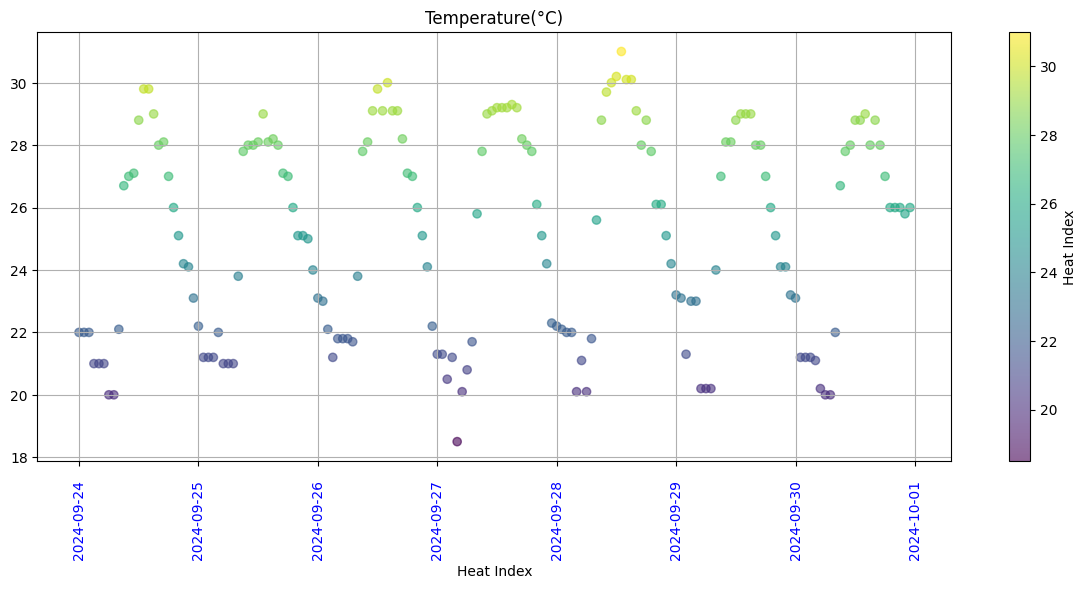

In [21]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Your data preparation code here (e.g., df creation, filestr, unitgroup)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colormap
sc = ax.scatter(df.index, df['temp'], c=df['temp'], cmap='viridis', alpha=0.6)

plt.title('Temperature(°C)')

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Heat Index')

# Set labels
ax.set_xlabel('Heat Index')
plt.xticks(rotation=90)


ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))


# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)
# ax.tick_params(axis='x', which='major', pad=15)



plt.grid()

# Displaying the chart
plt.tight_layout()
plt.show()

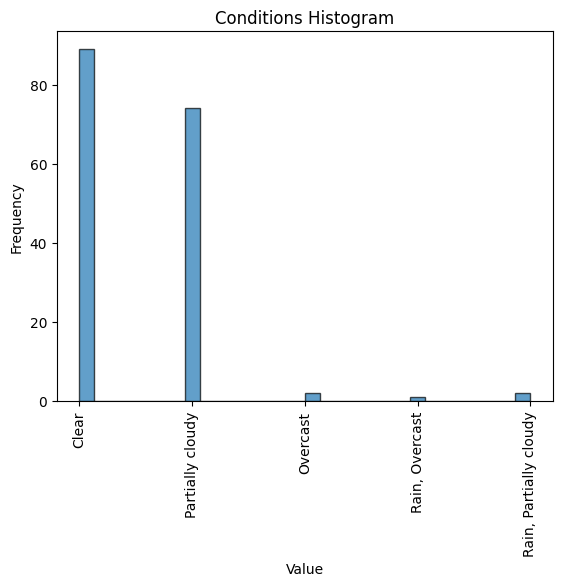

In [16]:
import matplotlib.pyplot as plt
import numpy as np


# Create the histogram
plt.hist(df['conditions'], bins=30, alpha=0.7, edgecolor='black')

# Add title and labels
plt.title('1-week Conditions Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

# Show the plot
plt.show()

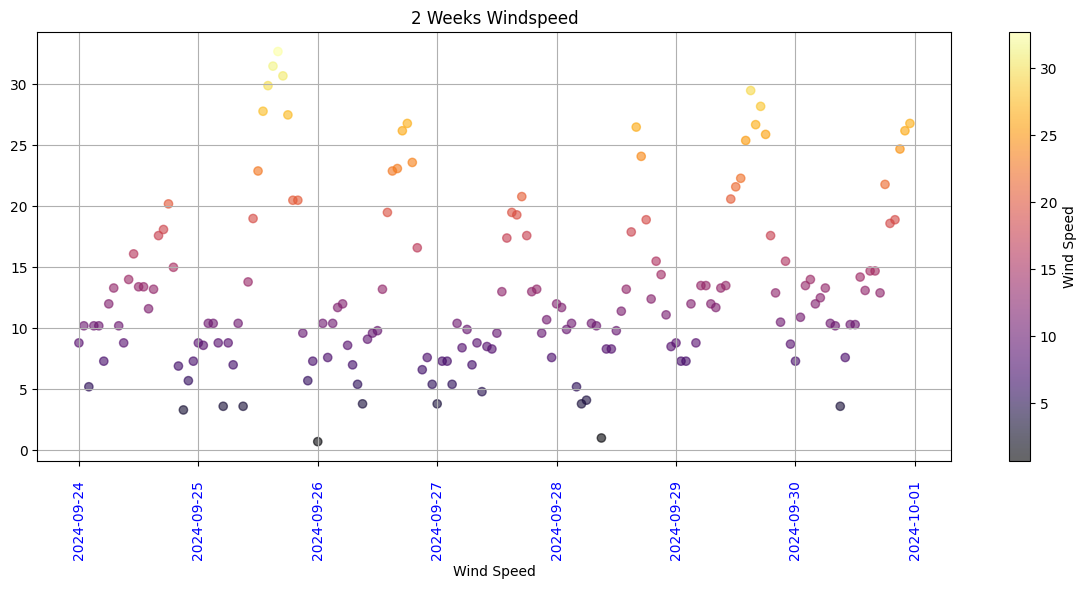

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Your data preparation code here (e.g., df creation, filestr, unitgroup)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colormap
sc = ax.scatter(df.index, df['windspeed'], c=df['windspeed'], cmap='inferno', alpha=0.6)

plt.title('2 Weeks Windspeed')

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Wind Speed')

# Set labels
ax.set_xlabel('Wind Speed')
plt.xticks(rotation=90)


ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))


# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)
# ax.tick_params(axis='x', which='major', pad=15)



plt.grid()

# Displaying the chart
plt.tight_layout()
plt.show()

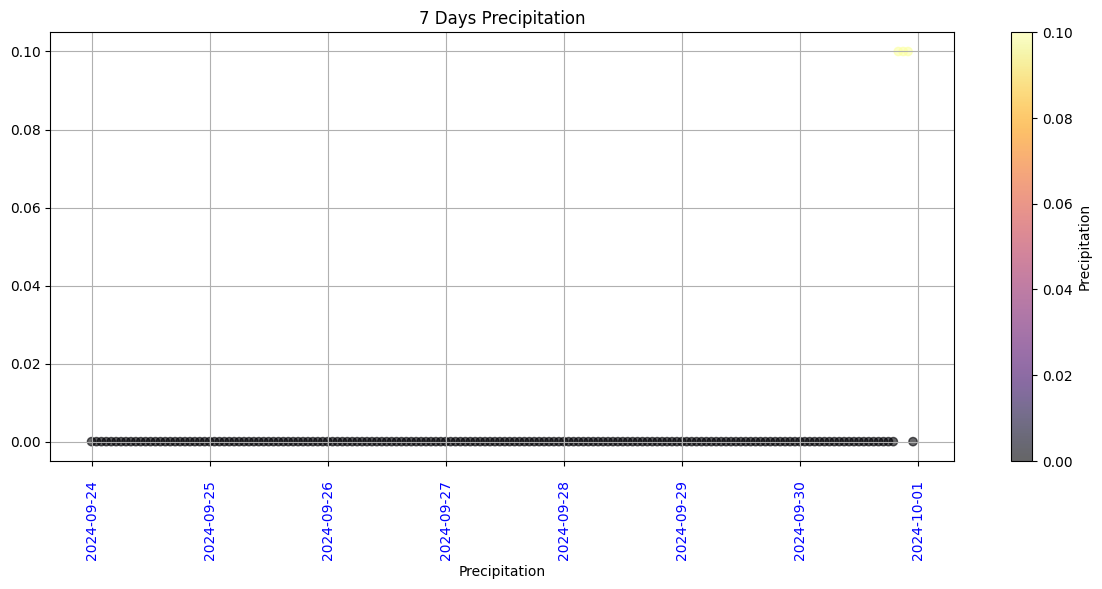

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Your data preparation code here (e.g., df creation, filestr, unitgroup)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colormap
sc = ax.scatter(df.index, df['precip'], c=df['precip'], cmap='inferno', alpha=0.6)

plt.title('7 Days Precipitation')

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Precipitation')

# Set labels
ax.set_xlabel('Precipitation')
plt.xticks(rotation=90)


ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))


# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)
# ax.tick_params(axis='x', which='major', pad=15)



plt.grid()

# Displaying the chart
plt.tight_layout()
plt.show()

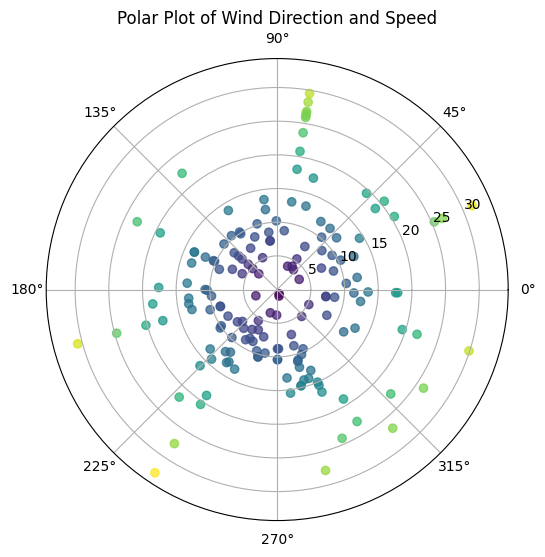

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random wind direction data in radians (0 to 2π) and wind speed
wind_direction = df['winddir']
wind_speed = df['windspeed']

# Create a polar plot
plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')
ax.scatter(wind_direction, wind_speed, c=wind_speed, cmap='viridis', alpha=0.75)

# Add title
plt.title('Polar Plot of Wind Direction and Speed')

# Show the plot
plt.show()
